Matteo Picciolini

# Esercitazione 6

In [1]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#numpy
import numpy as np

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### Risoluzione
#### Modello di Ising
Il modello di Ising è un modello fisico che descrive un sistema di spin posizionati ai nodi di un reticolo N-dimensionale, i quali possono assumere valori discreti $\pm 1$.

Gli spin interagiscono tra loro in genere limitatamente ai primi vicini, attraverso una forza di scambio che favorisce l'allineamento degli spin paralleli e l'antiallineamento degli spin antiparalleli. L'energia del sistema dipende quindi dall'orientazione di ciascuno spin: quando uno di questi viene ribaltato, l'energia del sistema cambia, dipendentemente dall'orientazione degli spin adiacenti.

Il modello di Ising è caratterizzato da un parametro di temperatura che regola, di fatto, l'intensità dell'interazione tra le particelle. A temperature basse, l'energia di scambio domina e il sistema tende a formare regioni di spin paralleli, cioè a magnetizzarsi. A temperature elevate, l'energia termica tende a disordinare il sistema e la magnetizzazione tende a zero. In altre parole, la temperatura influisce sulla propensione del sistema a magnetizzarsi o meno, a seconda dell'entità dell'interazione tra le particelle.

Il modello di Ising monodimensionale è risolubile analiticamente. Scrivendo l'Hamiltoniana del sistema come:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

possiamo ricavare la funzione di partizione $Z$ che avrà la seguente forma:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

con
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

Com'è noto dalla meccanica statistica di equilibrio, dalla funzione di partizione possiamo ricavare:

- L'**Energia Interna** per spin (con $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- La **capacità termica** (con $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T} = k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)=
\underset{h=0}= 
k_B N (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- La **Magnetizzazione** (con $h \not= 0$):

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

$$
\frac{M(N,T,h)}{N}=   \frac{k_B T}{N} \dfrac{\partial \ln Z}{\partial h} = \frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

Se $h=0$ la magnetizzazione $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ in quanto nel modello di Ising 1D non è possibile avere transizione di fase e quindi un sistema ferromagnetico.

- La **suscettività magnetica** (con $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

#### Campionamento Metropolis e Gibbs
Gli algoritmi di campionamento del peso di Boltzmann utilizzati sono il campionamento di Metropolis e il campionamento di Gibbs, che determinano il modo in cui lo spazio delle configurazioni di spin viene visitato. La condizione di temperatura costante implica che il sistema di spin nel modello di Ising 1D si trova in un *ensemble canonico*: il sistema scambia, cioè, energia con un bagno termico di capacità termica molto grande rispetto a quella del sistema. Questo scambio di energia permette, dal punto di vista macroscopico, di mantenere la temperatura costante del sistema durante la simulazione. In altre parole, il sistema di spin si trova in un ambiente che funge da regolatore di temperatura, garantendo che la temperatura del sistema rimanga costante durante la simulazione.

- L'algoritmo di Metropolis modifica l'orientazione di uno spin scelto a caso, passando da una configurazione $a$ a una configurazione $b$. La mossa viene accettata con una certa probabilità $A(b|a)$, che dipende dalla differenza di energia $\Delta E$ tra le due configurazioni e dalla temperatura $T$ del sistema. In particolare, la mossa viene sempre accettata se la nuova configurazione $b$ è più probabile della configurazione precedente $a$, mentre viene accettata con probabilità $\exp{\left(-\beta(\Delta E)\right)}$ se $b$ è meno probabile di $a$. In formule:
$$ A(b|a) = \min{\left(1, \, \exp{\left[ \beta \Delta E\right]} \right)},  $$ dove $\Delta E $ è la variazione di energia per lo spin-flip, tenendo conto che l'interazione è limitata ai primi vicini.

- L'algoritmo di Gibbs, invece, scelto casualmente uno spin della configurazione $a$, propone un nuovo valore per esso, indipendentemente dal suo valore nella configuazione $a$, estrapolato dalla distribuzione condizionale definita dagli altri spin vicini:
$$p(s_{k}=\pm 1) = \frac{1}{1 + \exp{[- 2 \beta \Delta E]}},$$
dove $\Delta E$ è la differenza di energia tra la configurazione in cui lo spin $i$-esimo è up e la configurazione in cui lo spin è down. In questo modo, l'algoritmo di Gibbs non rigetta alcun tentativo, il che lo rende più efficiente dell'algoritmo di Metropolis.


In sintesi, entrambi gli algoritmi di Metropolis e Gibbs sono utilizzati per generare configurazioni casuali di spin nel sistema di Ising 1D a una determinata temperatura. L'algoritmo di Metropolis cambia l'orientazione di uno spin scelto a caso e accetta la mossa con una certa probabilità, mentre l'algoritmo di Gibbs genera una nuova configurazione di spin imponendo il valore dello spin selezionato.

#### Commenti sul codice
Il codice contenuto nel file `Exercise_06.1.cpp` utilizza come paramentri di input quelli contentui nel file `input-output/input.dat`:
- `temp`: temperatura alla quale si vuole simulare o equilibrare il sistema;
- `nspin`: numero di spin che prendono parte alla simulazione. In questa esercitazione è fissato a $50$;
- `J`: momento angolare totale. In questa esercitazione è fissato al valore $1$;
- `h`: campo esterno. Quando non specificato si assume nullo;
- `metro`: parametro booleano per specificare se utilizzare un campionamento Metropolis ($1$) o Gibbs($0$);
- `nblk`: numero di blocchi;
- `nstep`: numero di steps per blocco.

Il programma è in grado di lavorare in modalità "equilibrazione" o "simulazione":
```
Usage: './Exercise_06.1 <equilibration>' with <equilibration> = {true, false, null}
```

Durante l'esecuzione, il programma chiederà all'utente di specificare se si desidera cancellare i file di output preesistenti, in modo da non mischiare assieme simulazioni diverse, visto che tutti i file sono aperti in modalità `append` dal programma.

In modalità "equilibrazione" il codice permette di studiare l'andamento delle varie grandezze d'interessere al variare del numero di blocchi con il metodo del *data blocking*. In questo modo si può intuire il numero di step necessari al sistema per equilibrarsi. 

In modalità "simulazione", invece, il codice non mostra l'andamento delle varie grandezze (perchè altrimenti per ogni grandezza si avrebbe un numero di file di output generati uguale al numero di temperature simulate) ma esso inserisce all'interno di quattro files di output il valore della grandezza d'interesse realtivo all'ultimo blocco della simulazione. In questo modo è stato possibile attraverso uno script `bash` modificare il valore della temperatura da file di input e iterare su tutte le temperature desiderate per ottenere la curva della grandezza di interessa in funzione della temperatura. Si riporta di seguito lo script:

```bash
#!/bin/bash

L=0.5,2.0  # intervallo da 0.5 a 2.0
N=50  # numero di punti

start=$(echo $L | awk -F ',' '{print $1}')
end=$(echo $L | awk -F ',' '{print $2}')
step=$(echo "scale=10; ($end - $start) / ($N - 1)" | bc)

for ((i=0; i<N; i++)); do
    t=$(echo "scale=10; $start + ($i * $step)" | bc)
    sed -i "1s/.*/$t/" input-output/input.dat
    echo -e "\n" | ./Exercise_06.1
done
```

#### Equilibrazione
Durante la fase di inizializzazione (tramite la funzione `Input()`), il codice genera una configurazione casuale di spin, che corrisponde alla condizione in cui la temperatura $T$ tende ad infinito. Durante l'esecuzione del programma, la funzione `Move()` modifica la configurazione del sistema in base alla temperatura impostata tramite il parametro `beta`, passato attraverso il file `input-output/input.dat`. Dopo un certo numero di chiamate a questa funzione, ci si aspetta che il sistema raggiunga una condizione stazionaria che riflette la temperatura impostata in input, e che quindi la fase di equilibrazione del sistema sia terminata.

Di seguito si mostra la fase di equilibrazione per la suscettività magnetica, l'energia interna e la capacità termica, con 100 blocchi composti da 100 step ciascuno. Per assicurarsi che la fase di equilibrazione non dipenda dalla temperatura scelta si sono simulate quattro diverse temperature nel range $\left[0.5,\,2.0 \right]$.

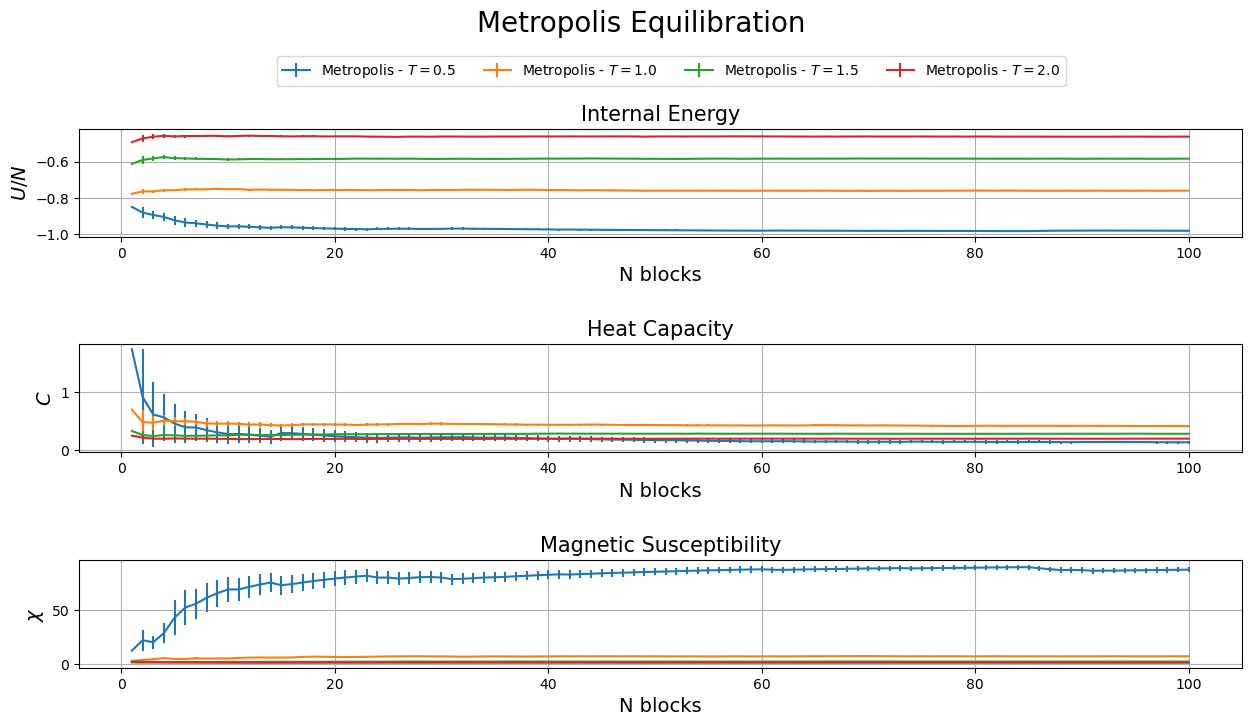

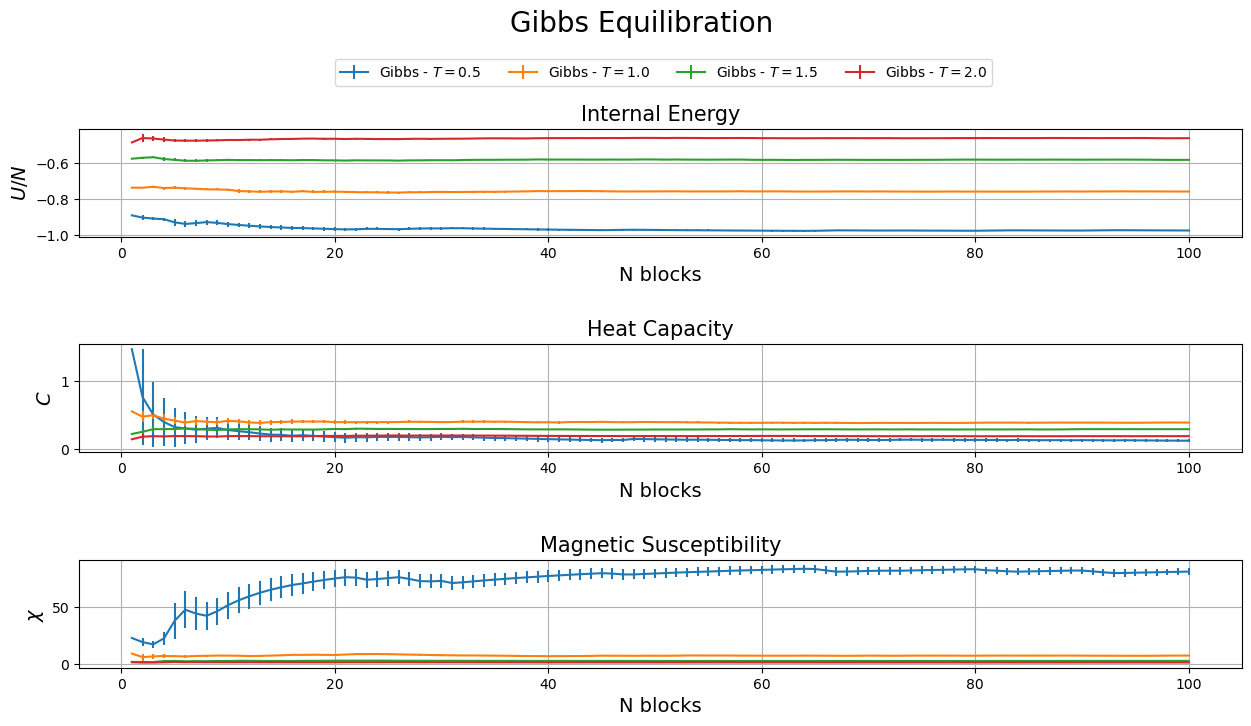

In [109]:
#Metropolis Equilibration
plt.figure(figsize = (15,7))
plt.suptitle("Metropolis Equilibration", fontsize = 20, y = 1.05)

plt.subplot(3, 1, 1)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_0.5_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Metropolis - $T = 0.5$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.0_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Metropolis - $T = 1.0$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.5_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Metropolis - $T = 1.5$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_2.0_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Metropolis - $T = 2.0$")

plt.ylabel('$U/N$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Internal Energy',  fontsize = 15)
plt.legend(ncol = 4, loc = (0.17, 1.4))


plt.subplot(3, 1, 2)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_0.5_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.0_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.5_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_2.0_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

plt.ylabel('$C$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Heat Capacity',  fontsize = 15)


plt.subplot(3, 1, 3)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_0.5_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.0_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_1.5_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_metro_2.0_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

plt.ylabel('$\chi$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Magnetic Susceptibility',  fontsize = 15)


plt.subplots_adjust(hspace = 1.0)
plt.show()



# Gibbs Equilibration
plt.figure(figsize = (15,7))
plt.suptitle("Gibbs Equilibration", fontsize = 20, y = 1.05)


plt.subplot(3, 1, 1)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_0.5_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gibbs - $T = 0.5$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.0_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gibbs - $T = 1.0$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.5_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gibbs - $T = 1.5$")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_2.0_0.00_ene.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gibbs - $T = 2.0$")

plt.ylabel('$U/N$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Internal Energy',  fontsize = 15)
plt.legend(ncol = 4, loc = (0.22, 1.4))


plt.subplot(3, 1, 2)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_0.5_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error,)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.0_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.5_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_2.0_0.00_heat.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

plt.ylabel('$C$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Heat Capacity',  fontsize = 15)


plt.subplot(3, 1, 3)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_0.5_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.0_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_1.5_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/06.1_eq_gibbs_2.0_0.00_chi.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error)

plt.ylabel('$\chi$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.title('Magnetic Susceptibility',  fontsize = 15)

plt.subplots_adjust(hspace = 1.)
plt.show()

Si può già notare senza ulteriori analisi che il sistema tende ad equilibrarsi dopo pochi passi. La grandezza che tende più difficoltosamente all'equilibrio è la suscettività magnetica, specialemtne nel caso a $T=0.5$. Si può sicuramente affermare che, in ogni caso, la fase di equilibrazione termina prima di $10^5$ steps. Per questo il programma è stato implementato in modo tale che, durante la fase di simulazione, i primi $10^5$ steps del walker non vengano considerati nelle medie, ma fungano da "sonde" dello spazio delle fasi per l'equilibrazione. Si riporta di seguito la parte di codice che è stata implementata nel `main` a tale scopo:
```c++
if(eq == "false"){
    for (int istep = 1; istep <= 1e5; ++istep){
        Move(metro);
    }
}
```

#### Simulazioni
Per le simulazioni si sono utilizzati $100$ blocchi ciascuno da $10^4$ steps. Per realizzare i grafici che seguono si è utilizzato il codice `bash` scritto nel file `run_all_temp.sh`, che estrapola il valore della grandezza d'interesse relativo all'ultimo blocco della simulazione a una temperatura specifica. Il codice `bash` itera il procedimento su 50 diverse temperature nell'intervallo $\left[0.5, \, 2.0\right]$. Si mostrano di seguito i risultati.

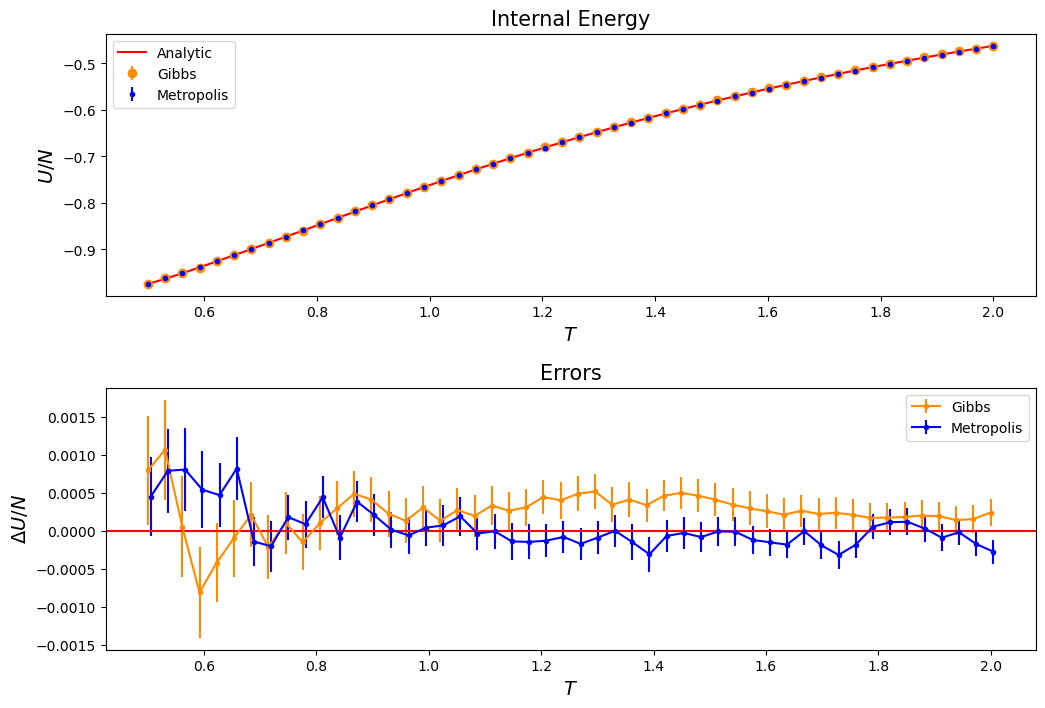

In [102]:
points = 50
T = np.linspace(0.5, 2.0, num = points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN = th ** Ns
ch = 1 / th
e = -J * (th + ch * thN) / (1 + thN)

plt.figure(figsize = (12,8))
plt.subplot(2, 1, 1)
plt.plot(T, e, label = "Analytic", c = 'red')
plt.title('Internal Energy', fontsize = 15)
plt.ylabel('$U/N$',  fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)

temp, ave_fin, err = np.loadtxt("../Data/06.1_temps_sim_gibbs_0.00_ene.dat",
                                usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin, yerr = err, marker = 'o', linestyle = "none", label = "Gibbs", color = "darkorange")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_temps_sim_metro_0.00_ene.dat",
                                    usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker = '.', linestyle = "none", label = "Metropolis", color = "blue")
plt.legend()

plt.subplot(2, 1, 2)
plt.errorbar(temp, ave_fin - e, yerr = err, marker = '.', label = "Gibbs", color = "darkorange")
plt.errorbar(temp + 0.005, ave_fin_m - e, yerr = err_m, marker = '.', label = "Metropolis", color = "blue")
plt.title("Errors", fontsize = 15)
plt.ylabel('$\Delta U/N$',  fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)
plt.legend()
plt.axhline(y = 0, c = 'red')
plt.subplots_adjust(hspace = 0.35)
plt.show()

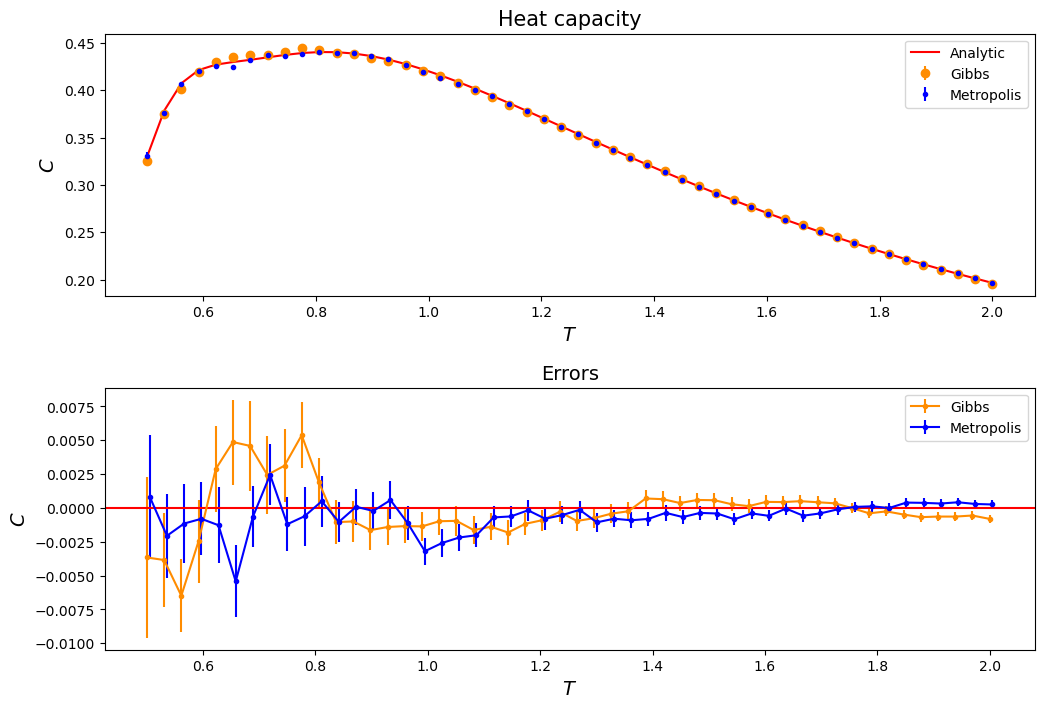

In [110]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.plot(T, heat, label = "Analytic", c = 'red')
plt.title('Heat capacity', fontsize = 15)
plt.xlabel('$T$',  fontsize = 14)
plt.ylabel('$C$',  fontsize = 14)

temp, ave_fin, err = np.loadtxt("../Data/06.1_temps_sim_gibbs_0.00_heat.dat",
                                usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin, yerr = err, marker = 'o', linestyle = "none", label = "Gibbs", color = "darkorange")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_temps_sim_metro_0.00_heat.dat",
                                    usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker = '.', linestyle = "none", label = "Metropolis", color = "blue")
plt.legend()

plt.subplot(2, 1, 2)
plt.errorbar(temp, ave_fin - heat, yerr = err, marker = '.', label = "Gibbs", color = "darkorange")
plt.errorbar(temp + 0.005, ave_fin_m - heat, yerr = err_m, marker = '.', label = "Metropolis", color = "blue")
plt.title("Errors", fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)
plt.ylabel('$C$',  fontsize = 14)
plt.axhline(y = 0, c = 'red')
plt.legend()

plt.subplots_adjust(hspace = 0.35)

plt.show()

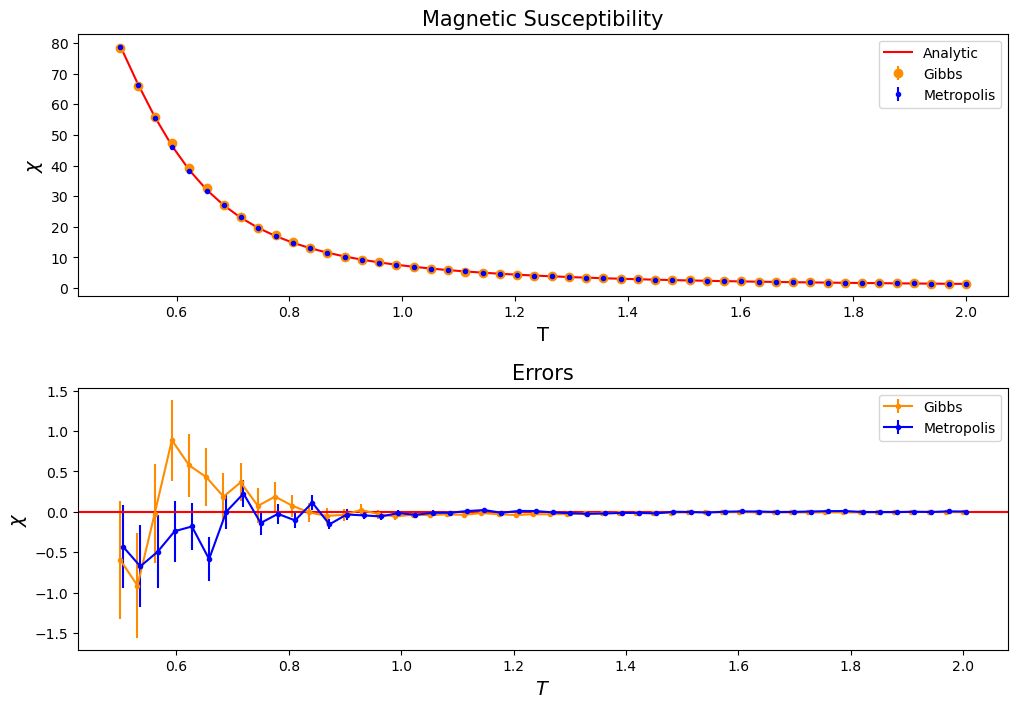

In [104]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = "Analytic", c = 'red')
plt.title('Magnetic Susceptibility', fontsize = 15)
plt.ylabel('$\chi$',  fontsize = 14)
plt.xlabel('T',  fontsize = 14)

temp, ave_fin, err = np.loadtxt("../Data/06.1_temps_sim_gibbs_0.00_chi.dat",
                                usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin, yerr = err, marker = 'o', linestyle = "none", label = "Gibbs", color = "darkorange")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_temps_sim_metro_0.00_chi.dat",
                                    usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker = '.', linestyle = "none", label = "Metropolis", color = "blue")
plt.legend()

plt.subplot(2, 1, 2)
plt.errorbar(temp, ave_fin - X, yerr = err, marker = '.', label = "Gibbs", color = "darkorange")
plt.errorbar(temp + 0.005, ave_fin_m - X, yerr = err_m, marker = '.', label = "Metropolis", color = "blue")
plt.title("Errors", fontsize = 15)
plt.ylabel('$\chi$',  fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)
plt.legend()
plt.axhline(y = 0, c = 'red')

plt.subplots_adjust(hspace = 0.35)
plt.show()

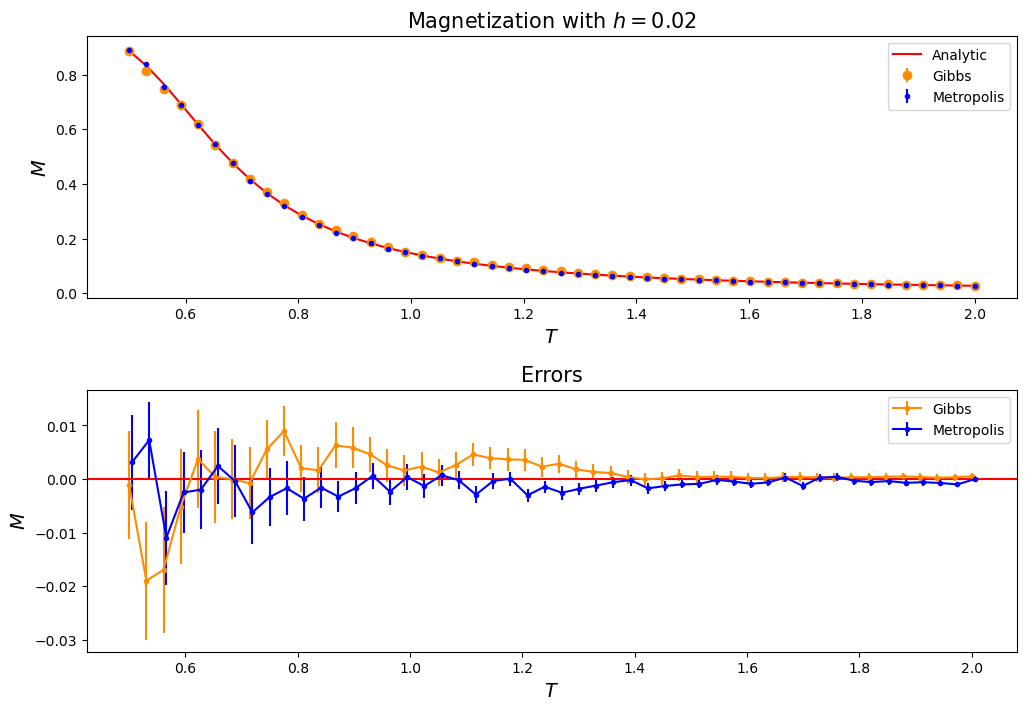

In [107]:
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
h = 0.02
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.plot(T, M, label = "Analytic", c = 'red')
plt.title('Magnetization with $h = 0.02$', fontsize = 15)
plt.ylabel('$M$',  fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)
temp, ave_fin, err = np.loadtxt("../Data/06.1_temps_sim_gibbs_0.02_mag.dat",
                                usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin, yerr = err, marker = 'o', linestyle = "none", label = "Gibbs", color = "darkorange")
temp, ave_fin_m, err_m = np.loadtxt("../Data/06.1_temps_sim_metro_0.02_mag.dat",
                                    usecols = (0, 1, 2), unpack = True)
plt.errorbar(temp, ave_fin_m, yerr = err_m, marker = '.', linestyle = "none", label = "Metropolis", color = "blue")
plt.legend()


plt.subplot(2, 1, 2)
plt.errorbar(temp, ave_fin - M, yerr = err, marker = '.', label = "Gibbs", color = "darkorange")
plt.errorbar(temp + 0.005, ave_fin_m - M, yerr = err_m, marker = '.', label = "Metropolis", color = "blue")
plt.title("Errors", fontsize = 15)
plt.ylabel('$M$',  fontsize = 14)
plt.xlabel('$T$',  fontsize = 14)
plt.axhline(y = 0, c = 'red')
plt.legend()

plt.subplots_adjust(hspace = 0.35)
plt.show()

I dati riportati nei grafici mostrano una buona compatibilità tra le misure e le previsioni teoriche, il che suggerisce che il numero di passi scelto è sufficientemente grande da coprire efficacemente lo spazio delle configurazioni, anche a basse temperature, dove l'ergodicità di Metropolis potrebbe non essere ideale.